In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import requests
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
depth = 50
today = datetime.now()
start_date = today - timedelta(days=depth)
ticker = "C:EURUSD"
POLYGON_KEY="2OdCNG0QvBe68ppV_vghyxf3cgCT8TSk"
response = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date.strftime("%Y-%m-%d")}/{today.strftime("%Y-%m-%d")}?adjusted=true&sort=asc&apiKey={POLYGON_KEY}')

In [3]:
response = response.json()

In [4]:
data = response.get("results", None)
historical_data = pd.DataFrame(data)
historical_data['date'] = pd.to_datetime(historical_data['t'], unit='ms')
historical_data.sort_values("date")
historical_data.set_index('date', inplace=True)
historical_data.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close'}, inplace=True)

In [5]:
def calculate_SMA(data: pd.DataFrame, length: int = 9):
    sma_series = data["Close"].rolling(window=length, min_periods=1).mean()
    sma_series[:length] = np.nan
    return sma_series

In [6]:
historical_data.head(20)

,v,vw,Open,Close,High,Low,t,n
date,,,,,,,,
2024-12-01,3004,1.0549,1.05584,1.05432,1.05686,1.05331,1733011200000,3004
2024-12-02,197561,1.0505,1.05434,1.05009,1.05460,1.04597,1733097600000,197561
2024-12-03,187362,1.0510,1.05004,1.05080,1.05351,1.04790,1733184000000,187362
2024-12-04,192994,1.0508,1.05100,1.05118,1.05440,1.04710,1733270400000,192994
2024-12-05,169683,1.0549,1.05124,1.05861,1.05920,1.05070,1733356800000,169683
2024-12-06,171226,1.0574,1.05865,1.05660,1.06298,1.05410,1733443200000,171226
2024-12-08,2019,1.0563,1.05579,1.05654,1.05689,1.05535,1733616000000,2019
2024-12-09,161705,1.0564,1.05656,1.05539,1.05943,1.05310,1733702400000,161705
2024-12-10,144245,1.0530,1.05551,1.05310,1.05681,1.04970,1733788800000,144245


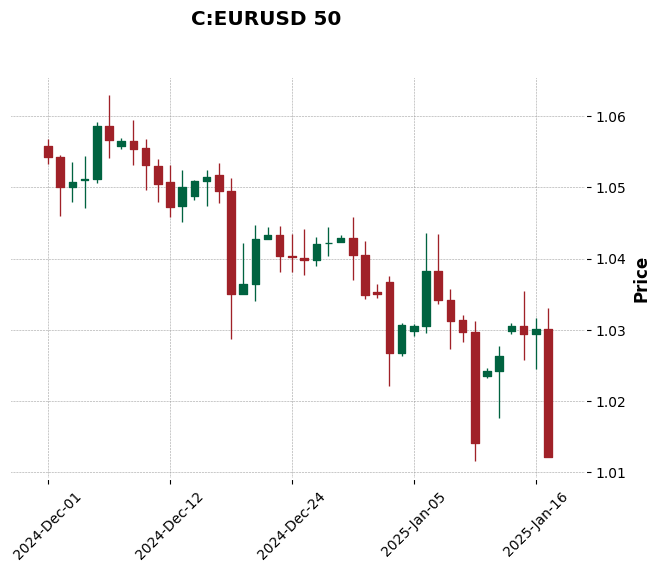

In [7]:
mpf.plot(historical_data, type='candle', style='charles', title=f"{ticker} {depth}", ylabel='Price')

In [8]:
sma9 = calculate_SMA(historical_data)
sma4 = calculate_SMA(historical_data, length=4)

In [9]:
data = pd.DataFrame({
    'sma9': sma9,
    'sma4': sma4
})

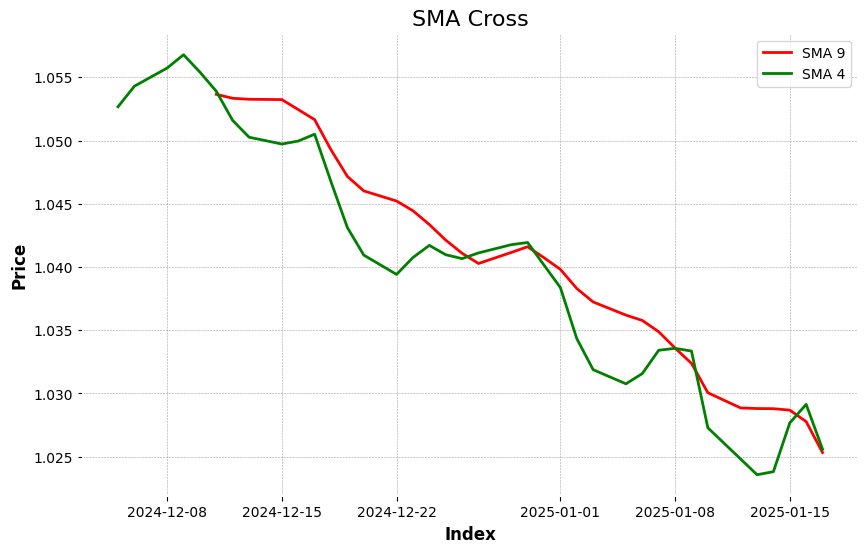

In [10]:
# Plot using Seaborn's lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x=data.index, y='sma9', label='SMA 9', color='r')
sns.lineplot(data=data, x=data.index, y='sma4', label='SMA 4', color='g')
#sns.lineplot(data=historical_data, x=data.index, y='Close', label='Close', color='b')

# Add labels and title
plt.title('SMA Cross', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [11]:
data["sma4greater"] = data["sma4"] > data["sma9"] 

In [12]:
data

,sma9,sma4,sma4greater
date,,,
2024-12-01,NaN,NaN,False
2024-12-02,NaN,NaN,False
2024-12-03,NaN,NaN,False
2024-12-04,NaN,NaN,False
2024-12-05,NaN,1.052670,False
2024-12-06,NaN,1.054298,False
2024-12-08,NaN,1.055732,False
2024-12-09,NaN,1.056785,False
2024-12-10,NaN,1.055408,False
